In [3]:
""" import the frequently used modules """
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pandas import DataFrame as DF, Series as SR, read_csv as CSV, read_excel as EX
from datetime import datetime, timedelta
import sys, os, importlib, math, sympy, scipy
%matplotlib inline

from logging import getLogger, DEBUG, INFO, FileHandler, StreamHandler, Formatter
formatter = Formatter('%(asctime)s - %(levelname)s - %(message)s')
sh = StreamHandler()
sh.setLevel(DEBUG)
fh = FileHandler(datetime.now().strftime('/tmp/%Y%m%d.log'))
fh.setFormatter(formatter)
fh.setLevel(INFO)
l = getLogger(__name__)
l.setLevel(DEBUG)
l.addHandler(sh)
l.addHandler(fh)

/Users/ysunagawa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def calc_poisson_distribution(Ys, poisson_mean):
    """ Return the probabilities to be the each value of y (array) given the poisson_mean (lambda)
    using the poisson distribution probability model
    """
    numerator = np.power(poisson_mean, Ys) * np.exp(-poisson_mean)
    denominator = scipy.misc.factorial(Ys)
    return numerator / denominator

In [5]:
def generate_samples(accumulated_probabilities, sample_size):
    """ Return the digitized result of the samples
    """
    samples = np.random.rand(sample_size)
    digitized_samples = np.digitize(samples, accumulated_probabilities)
    return digitized_samples

# calculate probabilities & test with sample data

# Sum of probabilities: 0.9966850557353676
# accumulated_probabilities: 
{0: 0.030197383422318501, 1: 0.13588822540043324, 2: 0.32084719886213409, 3: 0.53663266790078501, 4: 0.72544495330960457, 5: 0.85761355309577825, 6: 0.93471190297104623, 7: 0.97326107790868022, 8: 0.99012634194389504, 9: 1.0}


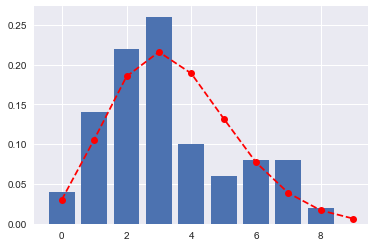

In [46]:
Y_count = 10
poisson_mean = 3.5
Ys = np.arange(Y_count)

probabilities = calc_poisson_distribution(Ys, poisson_mean)
l.debug("# Sum of probabilities: {}".format(probabilities.sum()))

accumulated_probabilities = np.add.accumulate(probabilities)
accumulated_probabilities[-1] = 1
l.info("# accumulated_probabilities: ")
l.info(dict(zip(Ys, accumulated_probabilities)))
    
digitized_samples = generate_samples(accumulated_probabilities, sample_size=50)

""" Series (key: Y, value: number of Y) """
number_of_Y = pd.Series(digitized_samples).value_counts().sort_index() / len(digitized_samples)

plt.bar(number_of_Y.index, number_of_Y.values)
plt.plot(Ys, probabilities, linestyle='--', marker='o', c='red')
plt.show()

# calculate the best fit point of the digitized sample data

best_fit: x=3.260000000000002, y=-102.57095681454284


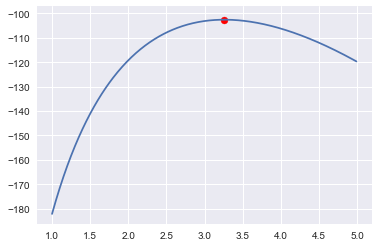

In [163]:
def calculate_log_likelihood(samples, mean):
    return math.log(np.prod(calc_poisson_distribution(samples, mean)))
    
xydf = DF([(mean, calculate_log_likelihood(digitized_samples, mean)) for mean in np.arange(1, 5, 0.01)], columns=list('xy'))
best_fit = xydf[xydf.y == [xydf.y.max()]].to_dict('record')[0]
l.info(f"best_fit: x={best_fit['x']}, y={best_fit['y']}")

plt.plot(xydf.x, xydf.y)
plt.scatter(best_fit['x'], best_fit['y'], color='red')